In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
import random
import math

# Define example functions from the assignment
def f1(x):
    return x**4 - 12*x**3 + 30*x**2 + 12

def f2(x):
    return np.sin(x) - np.cos(x)

def f3(x):
    return np.sin(2*x) + np.sin(x) + np.cos(3*x)

def f4(x):
    return np.sin(x)**2 - np.cos(x)**2

# Dictionary mapping function identifiers to actual functions
function_dict = {
    1: f1,
    2: f2,
    3: f3,
    4: f4
}

# Function to select which function to use
def select_function(func_id):
    if func_id in function_dict:
        return function_dict[func_id]
    else:
        raise ValueError(f"Function with ID {func_id} not found!")

In [64]:
def generate_points(x0, xn, n, func):
    """
    Generate n+1 interpolation points with x0 and xn as endpoints
    and intermediate points randomly distributed in (x0, xn)

    Parameters:
    x0 : float - starting point
    xn : float - ending point
    n : int - number of points between x0 and xn (total n+1 points)
    func : function - The function to evaluate at each point

    Returns:
    x_points: numpy array - points x0, x1, ..., xn
    y_points: numpy array - function values at those points
    """
    # Create array with endpoints
    x_points = np.zeros(n+1)
    x_points[0] = x0
    x_points[n] = xn

    # Generate n-1 random points between x0 and xn
    # Sort them to ensure x_{i-1} < x_i
    if n > 1:
        random_points = np.random.uniform(x0, xn, n-1)
        random_points.sort()
        x_points[1:n] = random_points

    # Calculate function values
    y_points = np.array([func(x) for x in x_points])

    print(f"Generated {n+1} points between {x0} and {xn}")
    print("First few points:")
    for i in range(min(5, n+1)):
        print(f"x{i} = {x_points[i]:.6f}, y{i} = {y_points[i]:.6f}")

    # If there are many points, also print the last point
    if n+1 > 5:
        print(f"x{n} = {x_points[n]:.6f}, y{n} = {y_points[n]:.6f}")

    return x_points, y_points

Generated 11 points between 1.0 and 5.0
First few points:
x0 = 1.000000, y0 = 31.000000
x1 = 1.648498, y1 = 47.153000
x2 = 1.770066, y2 = 49.260288
x3 = 1.965545, y3 = 51.703155
x4 = 2.028125, y4 = 52.210676
x10 = 5.000000, y10 = -113.000000
Polynomial coefficients (a0, a1, ..., a3):
a0 = -33.09980409
a1 = 82.53286886
a2 = -19.87835251
a3 = 0.02745622

Evaluation at x_bar = 2.5:
P3(2.5) = 49.42166823
f(2.5) = 51.06250000
|P3(2.5) - f(2.5)| = 1.64083177
Sum of absolute errors at all points: 13.74931070


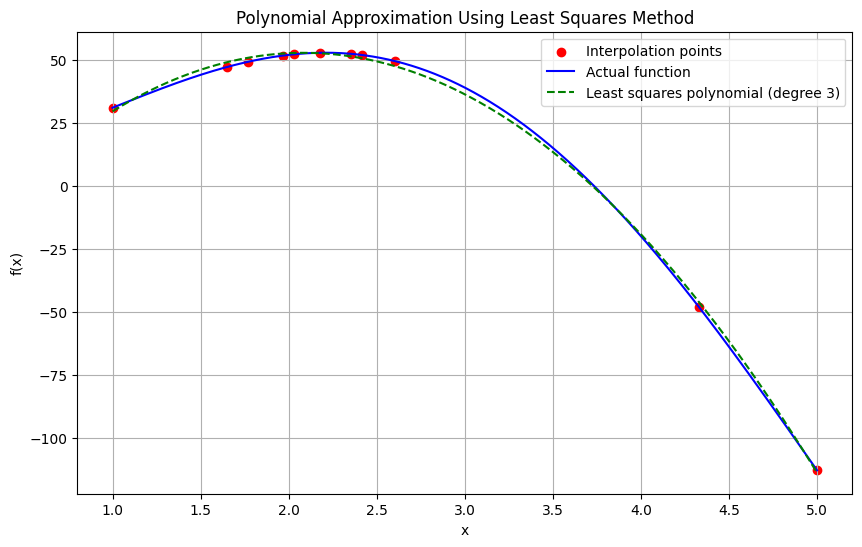

In [65]:
def least_squares_approximation(x_points, y_points, m):
    """
    Calculate the coefficients of a polynomial of degree m
    that best approximates the function using least squares method

    Parameters:
    x_points: numpy array - interpolation points x0, x1, ..., xn
    y_points: numpy array - function values at interpolation points
    m: int - degree of the polynomial (must be less than n+1)

    Returns:
    coeffs: numpy array - coefficients [a0, a1, ..., am] of the polynomial
    """
    n = len(x_points) - 1  # Number of points is n+1

    if m >= n+1:
        raise ValueError(f"Polynomial degree m={m} must be less than number of points n+1={n+1}")

    # Create the matrix B
    B = np.zeros((m+1, m+1))
    for i in range(m+1):
        for j in range(m+1):
            # B[i,j] = sum(x_k^(i+j)) for k from 0 to n
            B[i, j] = sum(x_points**(i+j))

    # Create the right-hand side vector f
    f = np.zeros(m+1)
    for i in range(m+1):
        # f[i] = sum(y_k * x_k^i) for k from 0 to n
        f[i] = sum(y_points * (x_points**i))

    # Solve the linear system Ba = f
    coeffs = linalg.solve(B, f)

    print(f"Polynomial coefficients (a0, a1, ..., a{m}):")
    for i, coeff in enumerate(coeffs):
        print(f"a{i} = {coeff:.8f}")

    return coeffs

def horner_evaluate(coeffs, x):
    """
    Evaluate a polynomial at point x using Horner's method

    Parameters:
    coeffs: numpy array - coefficients [a0, a1, ..., am] of the polynomial
    x: float - the point where to evaluate the polynomial

    Returns:
    result: float - the value of the polynomial at x
    """
    result = coeffs[-1]  # Start with the highest degree coefficient

    # Apply Horner's method
    for i in range(len(coeffs)-2, -1, -1):
        result = result * x + coeffs[i]

    return result

def calculate_total_error(x_points, y_points, coeffs):
    """
    Calculate the total absolute error between the polynomial and the actual values

    Parameters:
    x_points: numpy array - interpolation points x0, x1, ..., xn
    y_points: numpy array - function values at interpolation points
    coeffs: numpy array - coefficients [a0, a1, ..., am] of the polynomial

    Returns:
    total_error: float - sum of absolute errors
    """
    total_error = 0.0
    for i in range(len(x_points)):
        poly_value = horner_evaluate(coeffs, x_points[i])
        total_error += abs(poly_value - y_points[i])

    return total_error

# Example usage

func = select_function(1)  # Using the first function
x0, xn = 1.0, 5.0
n = 10  # 11 points in total
m = 3   # degree of polynomial

x_points, y_points = generate_points(x0, xn, n, func)
coeffs = least_squares_approximation(x_points, y_points, m)

# Point where to evaluate the approximation
x_bar = 2.5
actual_value = func(x_bar)
approximated_value = horner_evaluate(coeffs, x_bar)
error = abs(approximated_value - actual_value)

print(f"\nEvaluation at x_bar = {x_bar}:")
print(f"P{m}({x_bar}) = {approximated_value:.8f}")
print(f"f({x_bar}) = {actual_value:.8f}")
print(f"|P{m}({x_bar}) - f({x_bar})| = {error:.8f}")

total_error = calculate_total_error(x_points, y_points, coeffs)
print(f"Sum of absolute errors at all points: {total_error:.8f}")

# Plot for visualization
x_fine = np.linspace(x0, xn, 1000)
y_actual = np.array([func(x) for x in x_fine])
y_poly = np.array([horner_evaluate(coeffs, x) for x in x_fine])

plt.figure(figsize=(10, 6))
plt.scatter(x_points, y_points, color='red', label='Interpolation points')
plt.plot(x_fine, y_actual, 'b-', label='Actual function')
plt.plot(x_fine, y_poly, 'g--', label=f'Least squares polynomial (degree {m})')
plt.title(f'Polynomial Approximation Using Least Squares Method')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


Generated 9 points between 0.0 and 6.0
First few points:
x0 = 0.000000, y0 = 1.000000
x1 = 0.078922, y1 = 1.094592
x2 = 1.702831, y2 = 2.965739
x3 = 3.187582, y3 = 1.462387
x4 = 3.627607, y4 = 1.204166
x8 = 6.000000, y8 = 1.711155
Trigonometric coefficients:
a0 = 1.99500276
b1 = 2.21850058
a1 = 4.07010989
b2 = 5.69158007
a2 = -1.45749093
b3 = -1.71448376
a3 = -4.18890926
b4 = -2.14644701
a4 = 0.58128753

Evaluation at x_bar = 3.5:
Tn(3.5) = 1.49919706
f(3.5) = 1.26117868
|Tn(3.5) - f(3.5)| = 0.23801838


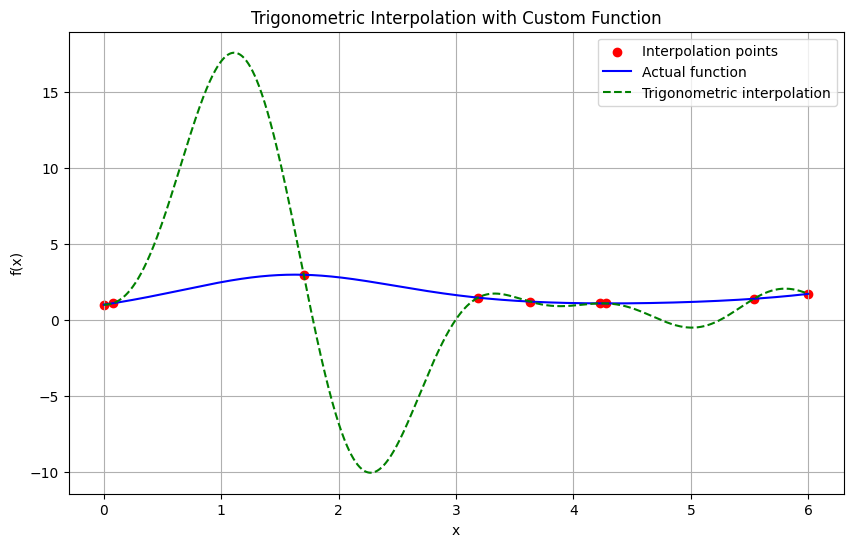

In [66]:
def trigonometric_interpolation(x_points, y_points):
    """
    Calculate the coefficients for trigonometric interpolation

    Parameters:
    x_points: numpy array - interpolation points x0, x1, ..., xn, where n = 2m
    y_points: numpy array - function values at interpolation points

    Returns:
    coeffs: numpy array - coefficients [a0, b1, a1, b2, a2, ..., bm, am]
    """
    n = len(x_points) - 1  # Number of points is n+1

    # Check if we have an odd number of points (n = 2m)
    if n % 2 != 0:
        raise ValueError(f"Number of points (n+1) must be odd for trigonometric interpolation")

    m = n // 2  # n = 2m

    # Create the matrix T
    T = np.zeros((n+1, n+1))

    # First column is all ones (phi_0(x) = 1)
    T[:, 0] = 1

    # Fill the rest of the matrix with sin and cos values
    for i in range(n+1):  # For each row (each point x_i)
        x = x_points[i]
        for k in range(1, m+1):  # For each frequency k
            # phi_{2k-1}(x) = sin(kx)
            T[i, 2*k-1] = np.sin(k * x)
            # phi_{2k}(x) = cos(kx)
            T[i, 2*k] = np.cos(k * x)

    # Solve the linear system TX = Y
    coeffs = linalg.solve(T, y_points)

    print(f"Trigonometric coefficients:")
    labels = ['a0'] + [f'b{k}' if j % 2 == 1 else f'a{j//2}' for j, k in enumerate([i//2 + 1 for i in range(1, n+1)], 1)]
    for label, coeff in zip(labels, coeffs):
        print(f"{label} = {coeff:.8f}")

    return coeffs

def evaluate_trigonometric(coeffs, x):
    """
    Evaluate the trigonometric polynomial at point x

    Parameters:
    coeffs: numpy array - coefficients [a0, b1, a1, b2, a2, ..., bm, am]
    x: float - the point where to evaluate the polynomial

    Returns:
    result: float - the value of the trigonometric polynomial at x
    """
    n = len(coeffs) - 1
    m = n // 2

    # Start with the constant term a0
    result = coeffs[0]

    # Add the contributions from sin and cos terms
    for k in range(1, m+1):
        # b_k * sin(k*x)
        result += coeffs[2*k-1] * np.sin(k * x)
        # a_k * cos(k*x)
        result += coeffs[2*k] * np.cos(k * x)

    return result

def calculate_trig_total_error(x_points, y_points, coeffs):
    """
    Calculate the total absolute error between the trigonometric polynomial and the actual values
    """
    total_error = 0.0
    for i in range(len(x_points)):
        trig_value = evaluate_trigonometric(coeffs, x_points[i])
        total_error += abs(trig_value - y_points[i])

    return total_error

def custom_function(x):
    return np.exp(np.sin(x)) + 0.5*x/np.pi

# Choose a periodic function
# Add the custom function to the dictionary
function_dict[5] = custom_function

# Test with the custom function
func = select_function(5)

# For trigonometric interpolation, we need points in [0, 2π)
x0, xn = 0.0, 6.0
n = 8  # 9 points total

# Generate points
x_points, y_points = generate_points(x0, xn, n, func)

# Calculate trigonometric coefficients
trig_coeffs = trigonometric_interpolation(x_points, y_points)

# Point where to evaluate the approximation
x_bar = 3.5
actual_value = func(x_bar)
trig_value = evaluate_trigonometric(trig_coeffs, x_bar)
error = abs(trig_value - actual_value)

print(f"\nEvaluation at x_bar = {x_bar}:")
print(f"Tn({x_bar}) = {trig_value:.8f}")
print(f"f({x_bar}) = {actual_value:.8f}")
print(f"|Tn({x_bar}) - f({x_bar})| = {error:.8f}")

# Plot for visualization
x_fine = np.linspace(x0, xn, 1000)
y_actual = np.array([func(x) for x in x_fine])
y_trig = np.array([evaluate_trigonometric(trig_coeffs, x) for x in x_fine])

plt.figure(figsize=(10, 6))
plt.scatter(x_points, y_points, color='red', label='Interpolation points')
plt.plot(x_fine, y_actual, 'b-', label='Actual function')
plt.plot(x_fine, y_trig, 'g--', label='Trigonometric interpolation')
plt.title('Trigonometric Interpolation with Custom Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()



==== Test Case: Polynomial function (x⁴-12x³+30x²+12) ====
Function: 1, x0: 1.0, xn: 5.0, n: 10, x_bar: 2.5
Generated 11 points between 1.0 and 5.0
First few points:
x0 = 1.000000, y0 = 31.000000
x1 = 1.014737, y1 = 31.412604
x2 = 1.270277, y2 = 38.415130
x3 = 1.473484, y3 = 43.458630
x4 = 1.559053, y4 = 45.353363
x10 = 5.000000, y10 = -113.000000

Actual value f(2.5) = 51.06250000

1. Polynomial Approximation (Least Squares)
------------------------------------------

Polynomial degree m = 1:
Polynomial coefficients (a0, a1, ..., a1):
a0 = 89.94712376
a1 = -32.94958056
P1(2.5) = 7.57317236
|P1(2.5) - f(2.5)| = 43.48932764
Sum of absolute errors at all points: 259.01029498

Polynomial degree m = 2:
Polynomial coefficients (a0, a1, ..., a2):
a0 = -32.93706363
a1 = 81.77207173
a2 = -19.57791521
P2(2.5) = 49.13114559
|P2(2.5) - f(2.5)| = 1.93135441
Sum of absolute errors at all points: 14.54428770

Polynomial degree m = 3:
Polynomial coefficients (a0, a1, ..., a3):
a0 = -23.69186047
a1 =

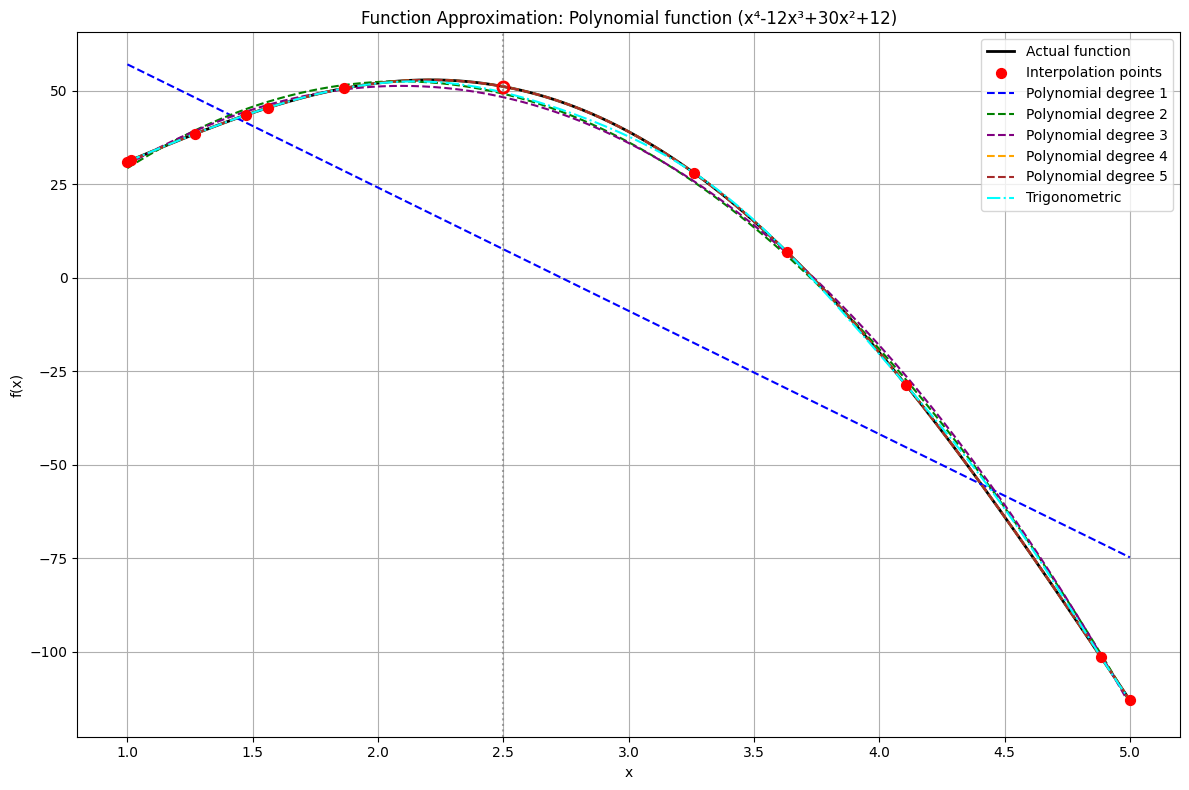


Summary of errors at x̄ = 2.5:
--------------------------------------------------
Method          Value at x̄     Abs Error       Total Error    
--------------------------------------------------
Polynomial 1    7.57317236      43.48932764     259.01029498   
Polynomial 2    49.13114559     1.93135441      14.54428770    
Polynomial 3    48.20980659     2.85269341      11.02946831    
Polynomial 4    51.06250000     0.00000000      0.00000000     
Polynomial 5    51.06250000     0.00000000      0.00000000     
Trigonometric   49.48254174     1.57995826      0.00000000     



==== Test Case: sin(x)-cos(x) with trig interpolation ====
Function: 2, x0: 0.0, xn: 6.0, n: 8, x_bar: 3.5
Generated 9 points between 0.0 and 6.0
First few points:
x0 = 0.000000, y0 = -1.000000
x1 = 0.595493, y1 = -0.266955
x2 = 2.534357, y2 = 1.391828
x3 = 3.261799, y3 = 0.872867
x4 = 4.865058, y4 = -1.140445
x8 = 6.000000, y8 = -1.239586

Actual value f(3.5) = 0.58567346

1. Polynomial Approximation (Least Squ

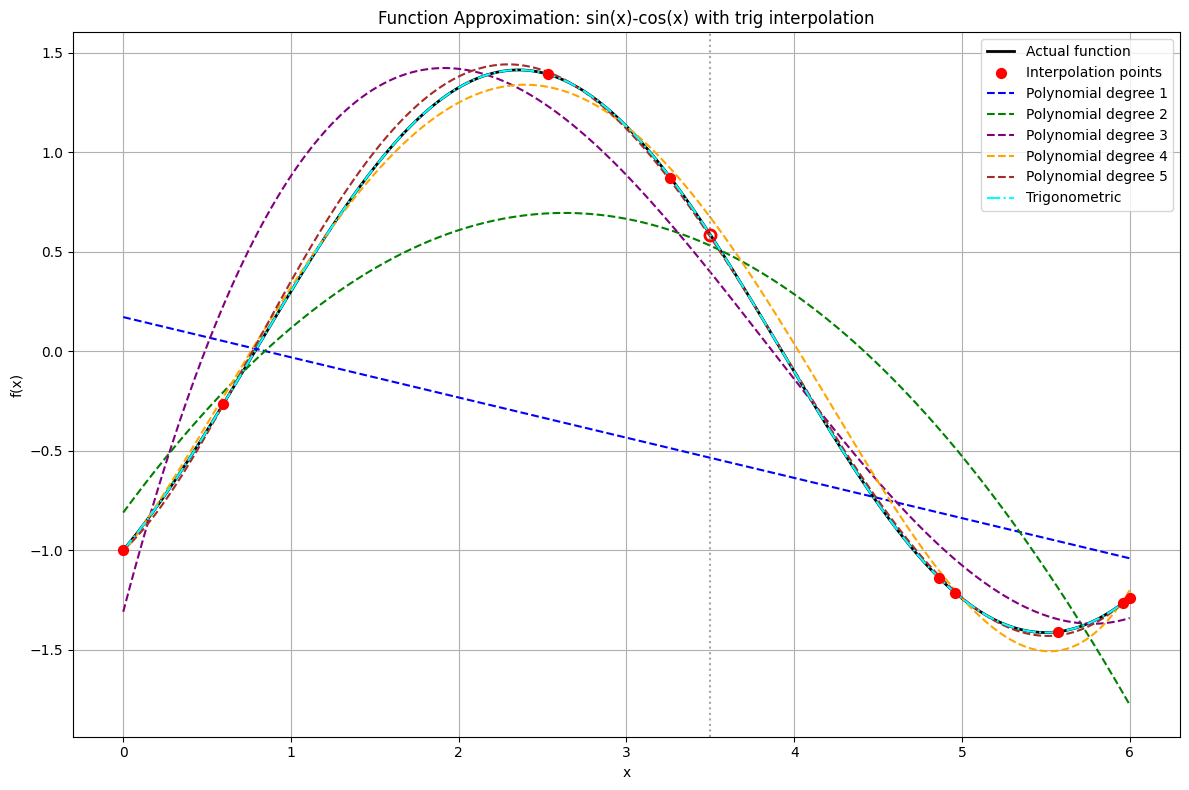


Summary of errors at x̄ = 3.5:
--------------------------------------------------
Method          Value at x̄     Abs Error       Total Error    
--------------------------------------------------
Polynomial 1    -0.53564627     1.12131973      6.18534742     
Polynomial 2    0.53066697      0.05500649      3.89466023     
Polynomial 3    0.39778094      0.18789252      1.77708955     
Polynomial 4    0.67292076      0.08724730      0.35368906     
Polynomial 5    0.57475713      0.01091633      0.07152746     
Trigonometric   0.58567346      0.00000000      0.00000000     



==== Test Case: sin(2x)+sin(x)+cos(3x) ====
Function: 3, x0: 0.0, xn: 6.0, n: 10, x_bar: 2.0
Generated 11 points between 0.0 and 6.0
First few points:
x0 = 0.000000, y0 = 1.000000
x1 = 1.127503, y1 = 0.707143
x2 = 1.797844, y2 = 1.165367
x3 = 2.715247, y3 = -0.627145
x4 = 3.734180, y4 = 0.573548
x10 = 6.000000, y10 = -0.155672

Actual value f(2.0) = 1.11266522

1. Polynomial Approximation (Least Squares)
-------

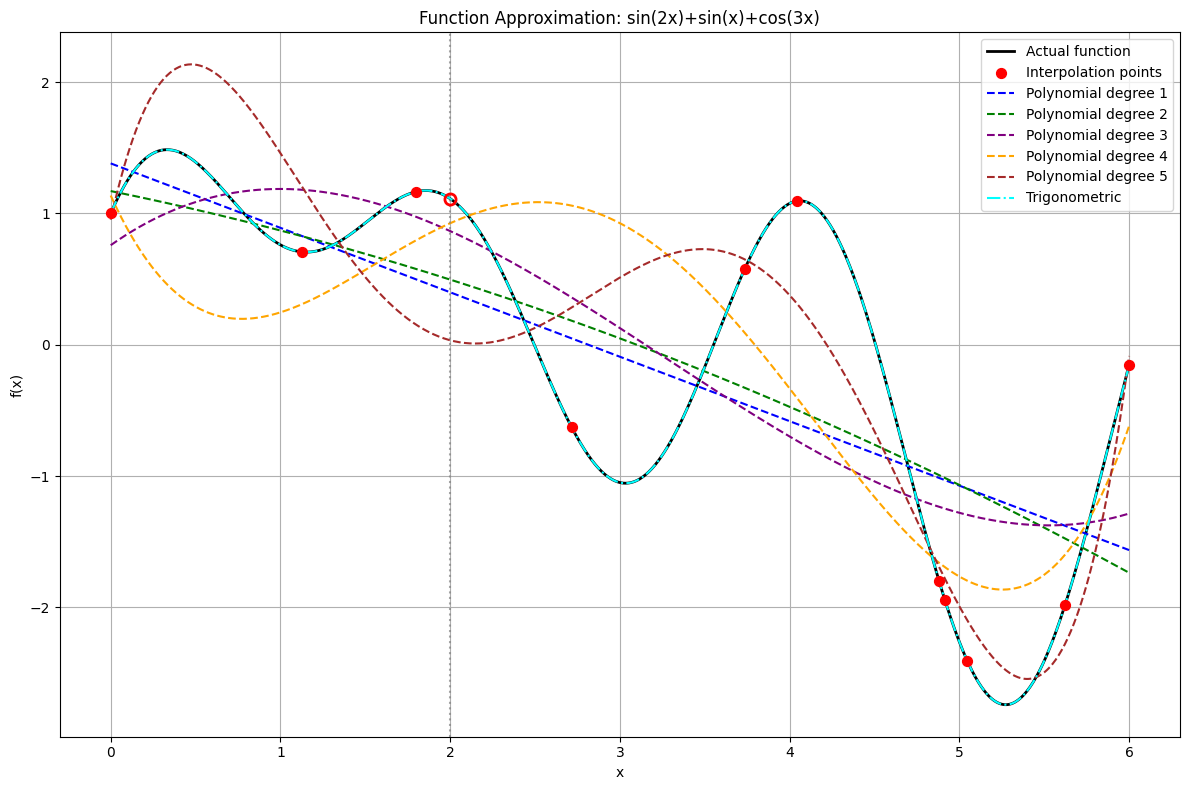


Summary of errors at x̄ = 2.0:
--------------------------------------------------
Method          Value at x̄     Abs Error       Total Error    
--------------------------------------------------
Polynomial 1    0.39962262      0.71304260      9.59456185     
Polynomial 2    0.49628304      0.61638218      9.32016242     
Polynomial 3    0.86581637      0.24684885      8.90059964     
Polynomial 4    0.92551923      0.18714598      6.42260693     
Polynomial 5    0.03425519      1.07841003      4.26709311     
Trigonometric   1.11266522      0.00000000      0.00000000     



==== Test Case: sin²(x)-cos²(x) ====
Function: 4, x0: 0.0, xn: 6.0, n: 12, x_bar: 4.5
Generated 13 points between 0.0 and 6.0
First few points:
x0 = 0.000000, y0 = -1.000000
x1 = 0.094636, y1 = -0.982141
x2 = 0.670485, y2 = -0.227809
x3 = 0.695032, y3 = -0.179750
x4 = 1.328977, y4 = 0.885309
x12 = 6.000000, y12 = -0.843854

Actual value f(4.5) = 0.91113026

1. Polynomial Approximation (Least Squares)
-----------

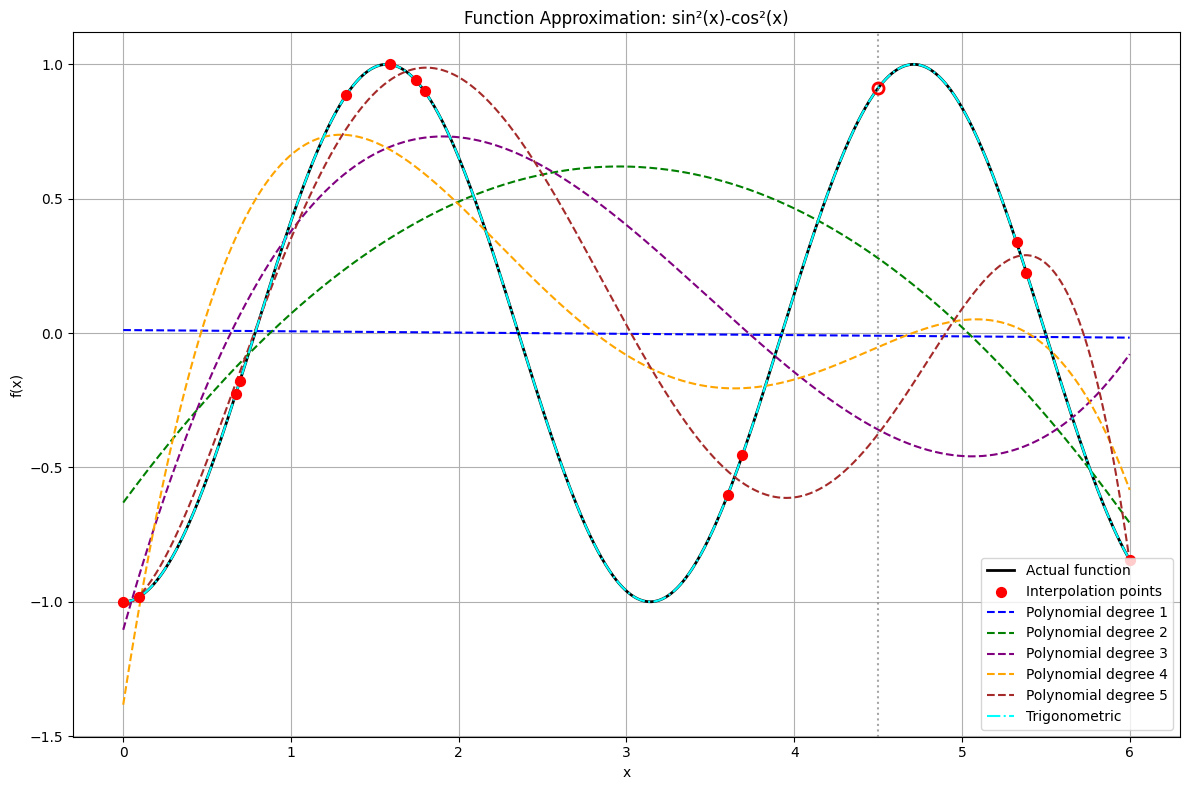


Summary of errors at x̄ = 4.5:
--------------------------------------------------
Method          Value at x̄     Abs Error       Total Error    
--------------------------------------------------
Polynomial 1    -0.00999915     0.92112941      8.60290851     
Polynomial 2    0.27863104      0.63249922      6.53219865     
Polynomial 3    -0.35932701     1.27045727      5.01062070     
Polynomial 4    -0.05229062     0.96342088      4.11558898     
Polynomial 5    -0.37578616     1.28691643      0.73170231     
Trigonometric   0.91113026      0.00000000      0.00000000     



==== Test Case: exp(sin(x))+0.5*x/π ====
Function: 5, x0: 0.0, xn: 6.0, n: 14, x_bar: 1.5
Generated 15 points between 0.0 and 6.0
First few points:
x0 = 0.000000, y0 = 1.000000
x1 = 0.707467, y1 = 2.027966
x2 = 1.984303, y2 = 2.814378
x3 = 2.409484, y3 = 2.334672
x4 = 2.654576, y4 = 2.019273
x14 = 6.000000, y14 = 1.711155

Actual value f(1.5) = 2.95021343

1. Polynomial Approximation (Least Squares)
------------

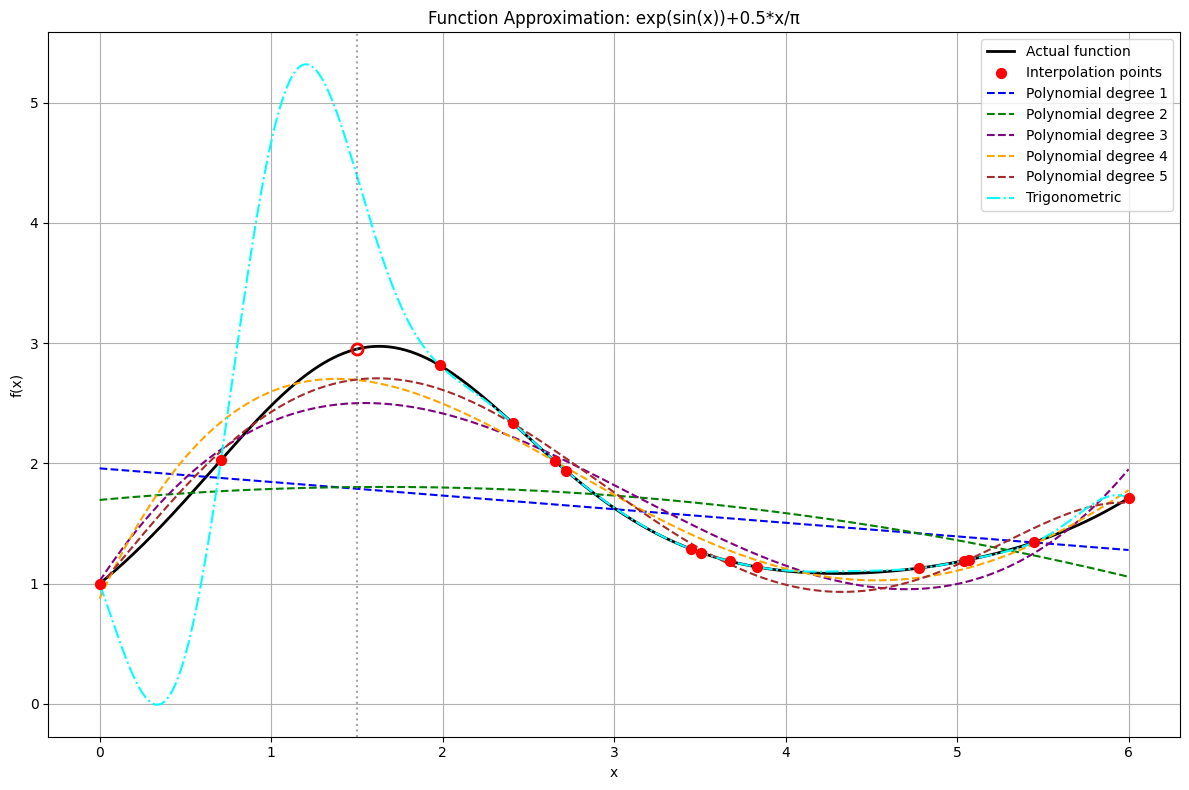


Summary of errors at x̄ = 1.5:
--------------------------------------------------
Method          Value at x̄     Abs Error       Total Error    
--------------------------------------------------
Polynomial 1    1.78879486      1.16141857      5.91484242     
Polynomial 2    1.80318159      1.14703184      6.04138191     
Polynomial 3    2.50055709      0.44965634      2.26373848     
Polynomial 4    2.69317977      0.25703366      1.57138023     
Polynomial 5    2.69712477      0.25308866      0.91730478     
Trigonometric   4.39269165      1.44247822      0.00000000     




In [77]:
def run_test_case(func_id, x0, xn, n, x_bar, case_name=""):
    """
    Run a single test case with predefined parameters

    Parameters:
    func_id: int - ID of the function to use (1-5)
    x0, xn: float - boundary points
    n: int - number of intervals
    x_bar: float - evaluation point
    case_name: str - name of the test case (for display purposes)
    """
    print(f"\n==== Test Case: {case_name} ====")
    print(f"Function: {func_id}, x0: {x0}, xn: {xn}, n: {n}, x_bar: {x_bar}")

    func = select_function(func_id)

    # Generate points
    x_points, y_points = generate_points(x0, xn, n, func)

    # Calculate actual value at x_bar
    actual_value = func(x_bar)
    print(f"\nActual value f({x_bar}) = {actual_value:.8f}")

    # Part 1: Least squares polynomial approximation
    print("\n1. Polynomial Approximation (Least Squares)")
    print("------------------------------------------")

    # Try different polynomial degrees
    degrees = [min(i, 5) for i in range(1, min(6, n+1))]

    results = []
    for m in degrees:
        print(f"\nPolynomial degree m = {m}:")
        coeffs = least_squares_approximation(x_points, y_points, m)

        # Evaluate at x_bar
        poly_value = horner_evaluate(coeffs, x_bar)
        point_error = abs(poly_value - actual_value)

        # Calculate total error at all points
        total_error = calculate_total_error(x_points, y_points, coeffs)

        print(f"P{m}({x_bar}) = {poly_value:.8f}")
        print(f"|P{m}({x_bar}) - f({x_bar})| = {point_error:.8f}")
        print(f"Sum of absolute errors at all points: {total_error:.8f}")

        results.append((m, poly_value, point_error, total_error, coeffs))

    # Part 2: Trigonometric interpolation (if applicable)
    if (n % 2 == 0) and (0 <= x0 < xn < 2*np.pi):
        print("\n2. Trigonometric Interpolation")
        print("-----------------------------")

        trig_coeffs = trigonometric_interpolation(x_points, y_points)

        # Evaluate at x_bar
        trig_value = evaluate_trigonometric(trig_coeffs, x_bar)
        trig_error = abs(trig_value - actual_value)

        # Calculate total error at all points
        trig_total_error = calculate_trig_total_error(x_points, y_points, trig_coeffs)
        print(f"Sum of absolute errors at all points: {trig_total_error:.8f}")

        print(f"Tn({x_bar}) = {trig_value:.8f}")
        print(f"|Tn({x_bar}) - f({x_bar})| = {trig_error:.8f}")

        # Add trigonometric results with total error
        results.append(('Trig', trig_value, trig_error, trig_total_error, trig_coeffs))

    else:
        print("\nTrigonometric interpolation requires:")
        print("1. Number of points must be odd (n must be even)")
        print("2. Points must be in the range [0, 2π)")
        if not (n % 2 == 0):
            print(f"   - Current n = {n} (not even)")
        if not (0 <= x0 < xn < 2*np.pi):
            print(f"   - Current range: [{x0}, {xn}] (not in [0, 2π))")

    # Plot results
    plt.figure(figsize=(12, 8))

    # Plot actual function
    x_fine = np.linspace(x0, xn, 1000)
    y_actual = np.array([func(x) for x in x_fine])
    plt.plot(x_fine, y_actual, 'k-', linewidth=2, label='Actual function')

    # Plot interpolation points
    plt.scatter(x_points, y_points, color='red', s=50, zorder=5, label='Interpolation points')

    # Plot polynomial approximations
    colors = ['blue', 'green', 'purple', 'orange', 'brown']
    for i, (m, _, _, _, coeffs) in enumerate([r for r in results if isinstance(r[0], int)]):
        y_poly = np.array([horner_evaluate(coeffs, x) for x in x_fine])
        plt.plot(x_fine, y_poly, '--', color=colors[i % len(colors)],
                 linewidth=1.5, label=f'Polynomial degree {m}')

    # Plot trigonometric approximation if available
    trig_result = [r for r in results if r[0] == 'Trig']
    if trig_result:
        _, _, _, _, trig_coeffs = trig_result[0]
        y_trig = np.array([evaluate_trigonometric(trig_coeffs, x) for x in x_fine])
        plt.plot(x_fine, y_trig, '-.', color='cyan', linewidth=1.5, label='Trigonometric')

    # Mark evaluation point
    plt.axvline(x=x_bar, color='gray', linestyle=':', alpha=0.7)
    plt.plot(x_bar, actual_value, 'ro', markersize=8, markerfacecolor='none',
             markeredgewidth=2, zorder=6)

    plt.title(f'Function Approximation: {case_name}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print("\nSummary of errors at x̄ = {}:".format(x_bar))
    print("-" * 50)
    print(f"{'Method':<15} {'Value at x̄':<15} {'Abs Error':<15} {'Total Error':<15}")
    print("-" * 50)
    for method, value, error, total, _ in results:
        method_name = f"Polynomial {method}" if isinstance(method, int) else "Trigonometric"
        total_str = f"{total:.8f}" if total is not None else "N/A"
        print(f"{method_name:<15} {value:<15.8f} {error:<15.8f} {total_str:<15}")

def run_all_tests():
    """
    Run all predefined test cases
    """
    # Define test cases as (func_id, x0, xn, n, x_bar, case_name)
    test_cases = [
        # Test case 1: Polynomial function from examples
        (1, 1.0, 5.0, 10, 2.5, "Polynomial function (x⁴-12x³+30x²+12)"),

        # Test case 2: Sine-Cosine function with trigonometric interpolation
        (2, 0.0, 6.0, 8, 3.5, "sin(x)-cos(x) with trig interpolation"),

        # Test case 3: More complex trigonometric function
        (3, 0.0, 6.0, 10, 2.0, "sin(2x)+sin(x)+cos(3x)"),

        # Test case 4: Function with square terms
        (4, 0.0, 6.0, 12, 4.5, "sin²(x)-cos²(x)"),

        # Test case 5: Custom function that's not easily represented by trigonometric series
        (5, 0.0, 6.0, 14, 1.5, "exp(sin(x))+0.5*x/π")
    ]

    # Run each test case
    for test_case in test_cases:
        run_test_case(*test_case)
        print("\n" + "="*60 + "\n")

# Run all the test cases
run_all_tests()